### Installing dependencies

In [2]:
!pip install fsspec
!pip install huggingface-hub
!pip install pyarrow

### Loading Datasets

In [3]:
import pandas as pd
all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")

# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

In [123]:
tables = {
    "all_pull_request": all_pr_df,
    "all_repository": all_repo_df,
    "all_user": all_user_df,

    "pull_request": pr_df,
    "repository": repo_df,
    "user": user_df,

    "pr_comments": pr_comments_df,
    "pr_reviews": pr_reviews_df,
    "pr_review_comments_v2": pr_review_comments_df,

    "pr_commits": pr_commits_df,
    "pr_commit_details": pr_commit_details_df,

    "related_issue": related_issue_df,
    "issue": issue_df,

    "pr_timeline": pr_timeline_df,

    "pr_task_type": pr_task_type_df,

    "human_pull_request": human_pr_df,
    "human_pr_task_type": human_pr_task_type_df,
}

# 2) Build a summary table
summary = pd.DataFrame([
    {
        "table": name,
        "rows": df.shape[0],
        "cols": df.shape[1],
        "size_MB": round(df.memory_usage(deep=True).sum() / (1024**2), 2),
        "columns (parameters)": ", ".join(df.columns.astype(str)),  # can be long
    }
    for name, df in tables.items()
])

# 3) Sort and display
summary = summary.sort_values(["size_MB", "rows"], ascending=False).reset_index(drop=True)
summary

,table,rows,cols,size_MB,columns (parameters)
0,pr_commit_details,711923,14,2214.81,"sha, pr_id, author, committer, message, commit..."
1,all_pull_request,932791,14,1706.04,"id, number, title, body, agent, user_id, user,..."
2,pr_timeline,325500,8,280.26,"pr_id, event, commit_id, created_at, actor, as..."
3,pr_comments,39122,7,194.56,"id, pr_id, user, user_id, user_type, created_a..."
4,pull_request,33596,14,102.55,"id, number, title, body, agent, user_id, user,..."
5,pr_review_comments_v2,26868,15,91.05,"id, pull_request_review_id, user, user_type, d..."
6,pr_reviews,28875,7,59.10,"id, pr_id, user, user_type, state, submitted_a..."
7,pr_commits,88576,5,34.60,"sha, pr_id, author, committer, message"
8,all_repository,116211,7,31.71,"id, url, license, full_name, language, forks, ..."
9,human_pull_request,6618,13,31.47,"id, number, title, user, user_id, state, creat..."


### Dataframe.info()

In [22]:
all_pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932791 entries, 0 to 932790
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          932791 non-null  int64  
 1   number      932791 non-null  int64  
 2   title       932790 non-null  object 
 3   body        924018 non-null  object 
 4   agent       932791 non-null  object 
 5   user_id     932791 non-null  int64  
 6   user        932791 non-null  object 
 7   state       932791 non-null  object 
 8   created_at  932791 non-null  object 
 9   closed_at   859927 non-null  object 
 10  merged_at   790139 non-null  object 
 11  repo_id     930292 non-null  float64
 12  repo_url    932791 non-null  object 
 13  html_url    932791 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 99.6+ MB


In [5]:
all_repo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116211 entries, 0 to 116210
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         116211 non-null  int64  
 1   url        116211 non-null  object 
 2   license    40105 non-null   object 
 3   full_name  116211 non-null  object 
 4   language   104225 non-null  object 
 5   forks      116211 non-null  float64
 6   stars      116211 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ MB


In [6]:
all_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72189 entries, 0 to 72188
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          72167 non-null  float64
 1   login       72189 non-null  object 
 2   followers   72167 non-null  float64
 3   following   72167 non-null  float64
 4   created_at  72167 non-null  object 
dtypes: float64(3), object(2)
memory usage: 2.8+ MB


In [7]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33596 entries, 0 to 33595
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33596 non-null  int64 
 1   number      33596 non-null  int64 
 2   title       33596 non-null  object
 3   body        33236 non-null  object
 4   agent       33596 non-null  object
 5   user_id     33596 non-null  int64 
 6   user        33596 non-null  object
 7   state       33596 non-null  object
 8   created_at  33596 non-null  object
 9   closed_at   31284 non-null  object
 10  merged_at   24014 non-null  object
 11  repo_id     33596 non-null  int64 
 12  repo_url    33596 non-null  object
 13  html_url    33596 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.6+ MB


In [8]:
repo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2807 non-null   int64 
 1   url        2807 non-null   object
 2   license    2616 non-null   object
 3   full_name  2807 non-null   object
 4   language   2770 non-null   object
 5   forks      2807 non-null   int64 
 6   stars      2807 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 153.6+ KB


In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1796 non-null   int64  
 1   login       1796 non-null   object 
 2   followers   1796 non-null   float64
 3   following   1796 non-null   float64
 4   created_at  1796 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 70.3+ KB


In [10]:
pr_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39122 entries, 0 to 39121
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          39122 non-null  int64 
 1   pr_id       39122 non-null  int64 
 2   user        39122 non-null  object
 3   user_id     39122 non-null  int64 
 4   user_type   39122 non-null  object
 5   created_at  39122 non-null  object
 6   body        39122 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.1+ MB


In [11]:
pr_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28875 entries, 0 to 28874
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            28875 non-null  int64 
 1   pr_id         28875 non-null  int64 
 2   user          28874 non-null  object
 3   user_type     28874 non-null  object
 4   state         28875 non-null  object
 5   submitted_at  28875 non-null  object
 6   body          7941 non-null   object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [12]:
pr_review_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26868 entries, 0 to 26867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      26868 non-null  int64  
 1   pull_request_review_id  26868 non-null  int64  
 2   user                    26868 non-null  object 
 3   user_type               26868 non-null  object 
 4   diff_hunk               26004 non-null  object 
 5   path                    26868 non-null  object 
 6   position                13053 non-null  float64
 7   original_position       26868 non-null  int64  
 8   commit_id               26868 non-null  object 
 9   original_commit_id      26868 non-null  object 
 10  body                    26867 non-null  object 
 11  pull_request_url        26868 non-null  object 
 12  created_at              26868 non-null  object 
 13  updated_at              26868 non-null  object 
 14  in_reply_to_id          8904 non-null 

In [13]:
pr_commits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88576 entries, 0 to 88575
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sha        88576 non-null  object
 1   pr_id      88576 non-null  int64 
 2   author     88575 non-null  object
 3   committer  88575 non-null  object
 4   message    88575 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [14]:
pr_commit_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711923 entries, 0 to 711922
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   sha                     711923 non-null  object 
 1   pr_id                   711923 non-null  int64  
 2   author                  711920 non-null  object 
 3   committer               711920 non-null  object 
 4   message                 711903 non-null  object 
 5   commit_stats_total      711923 non-null  int64  
 6   commit_stats_additions  711923 non-null  int64  
 7   commit_stats_deletions  711923 non-null  int64  
 8   filename                706791 non-null  object 
 9   status                  706791 non-null  object 
 10  additions               706791 non-null  float64
 11  deletions               706791 non-null  float64
 12  changes                 706791 non-null  float64
 13  patch                   641721 non-null  object 
dtypes: float64(3), int64

In [15]:
related_issue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pr_id     4923 non-null   int64  
 1   issue_id  4923 non-null   float64
 2   source    4923 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 115.5+ KB


In [16]:
issue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4614 non-null   int64 
 1   number      4614 non-null   int64 
 2   title       4614 non-null   object
 3   body        4490 non-null   object
 4   user        4614 non-null   object
 5   state       4614 non-null   object
 6   created_at  4614 non-null   object
 7   closed_at   3167 non-null   object
 8   html_url    4614 non-null   object
dtypes: int64(2), object(7)
memory usage: 324.6+ KB


In [17]:
pr_timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325500 entries, 0 to 325499
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   pr_id       325500 non-null  int64 
 1   event       325500 non-null  object
 2   commit_id   122040 non-null  object
 3   created_at  229900 non-null  object
 4   actor       309631 non-null  object
 5   assignee    11863 non-null   object
 6   label       29285 non-null   object
 7   message     112691 non-null  object
dtypes: int64(1), object(7)
memory usage: 19.9+ MB


In [18]:
pr_task_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33596 entries, 0 to 33595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   agent       33596 non-null  object
 1   id          33596 non-null  int64 
 2   title       33596 non-null  object
 3   reason      33596 non-null  object
 4   type        33596 non-null  object
 5   confidence  33596 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [19]:
human_pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6618 entries, 0 to 6617
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6618 non-null   int64 
 1   number      6618 non-null   int64 
 2   title       6618 non-null   object
 3   user        6618 non-null   object
 4   user_id     6618 non-null   int64 
 5   state       6618 non-null   object
 6   created_at  6618 non-null   object
 7   closed_at   6149 non-null   object
 8   merged_at   5081 non-null   object
 9   repo_url    6618 non-null   object
 10  html_url    6618 non-null   object
 11  body        5623 non-null   object
 12  agent       6618 non-null   object
dtypes: int64(3), object(10)
memory usage: 672.3+ KB


In [20]:
human_pr_task_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6618 entries, 0 to 6617
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   agent       6618 non-null   object 
 1   id          6618 non-null   int64  
 2   title       6618 non-null   object 
 3   reason      6618 non-null   object 
 4   type        6618 non-null   object 
 5   confidence  0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 310.3+ KB


### Preliminary Analysis

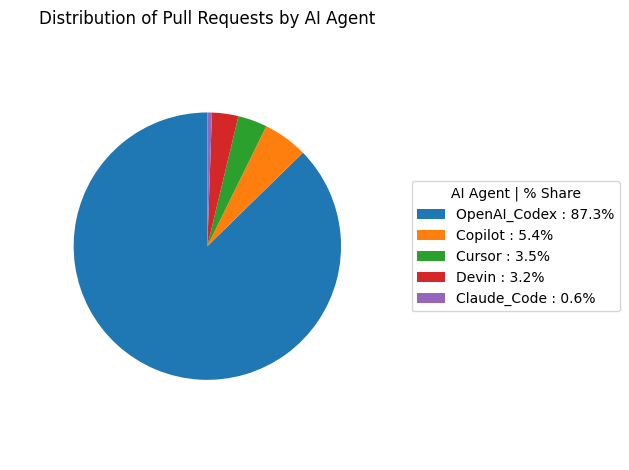

In [141]:
import matplotlib.pyplot as plt

agent_counts = all_pr_df["agent"].value_counts()

# Convert counts to percentages
percentages = agent_counts / agent_counts.sum() * 100

# Create labels like a table: "Agent : XX.X%"
legend_labels = [
    f"{agent} : {pct:.1f}%" 
    for agent, pct in zip(agent_counts.index, percentages)
]

plt.figure()
plt.pie(
    agent_counts,
    startangle=90
)

plt.title("Distribution of Pull Requests by AI Agent")
plt.axis("equal")

# Add legend (this is your small tabular column)
plt.legend(
    legend_labels,
    title="AI Agent | % Share",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

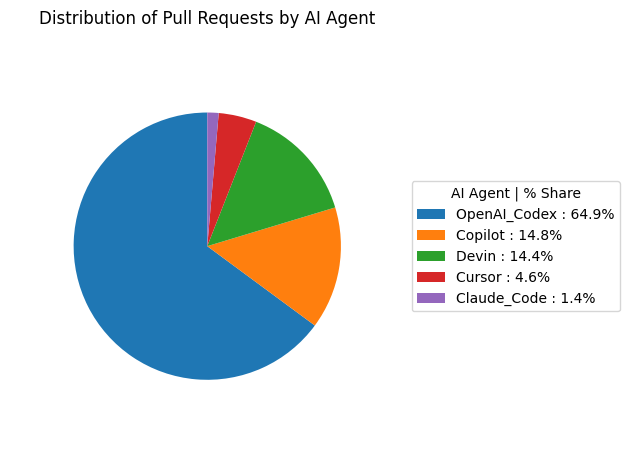

In [142]:
agent_counts = pr_df["agent"].value_counts()
percentages = agent_counts / agent_counts.sum() * 100

legend_labels = [
    f"{agent} : {pct:.1f}%" 
    for agent, pct in zip(agent_counts.index, percentages)
]

plt.figure()
plt.pie(
    agent_counts,
    startangle=90
)

plt.title("Distribution of Pull Requests by AI Agent")
plt.axis("equal")

plt.legend(
    legend_labels,
    title="AI Agent | % Share",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

## Research Question - 1

#### How Effective is the Code created by AI Agents compared to Human
We evaluate the effectiveness of AI generated code and Human generated code by seeing if the Pull Request was merged or not. The tables we are consideriing for this are -
- all_pr_df
- pr_df
- human_pr_df

#### AI Pull Requests

In [98]:
import numpy as np

temp = all_pr_df.loc[all_pr_df["closed_at"].notna()].copy()

def convert_df(df):
    new = df.loc[:, ["id","agent","user_id","state","created_at","closed_at","merged_at"]].copy()


    new["created_at"] = pd.to_datetime(new["created_at"], errors="coerce")


    new["status"] = np.where(new["merged_at"].isna(), "Rejected", "Accepted")

    new = new.loc[:, ["id","agent","user_id","created_at","status"]]

    new["created_at"] = new["created_at"].dt.strftime("%b %Y")

    return new
 
def percentage(df):
    df["acceptance_percentage"] = np.where(
    (df["Accepted"] + df["Rejected"]) == 0,
    np.nan,
    df["Accepted"] * 100 / (df["Accepted"] + df["Rejected"])
    )
    return df

RQ1_all_pr = convert_df(temp)
RQ1_all_pr

,id,agent,user_id,created_at,status
0,3264016139,Claude_Code,37011,Jul 2025,Accepted
2,3264042289,Claude_Code,6766889,Jul 2025,Rejected
3,3264042318,Claude_Code,6766889,Jul 2025,Rejected
4,3264067496,Claude_Code,42357482,Jul 2025,Accepted
5,3264372403,Claude_Code,62402155,Jul 2025,Accepted
...,...,...,...,...,...
932786,2858495710,Devin,158243242,Feb 2025,Accepted
932787,2858498986,Devin,158243242,Feb 2025,Accepted
932788,2858525953,Devin,158243242,Feb 2025,Accepted
932789,2858527610,Devin,158243242,Feb 2025,Rejected


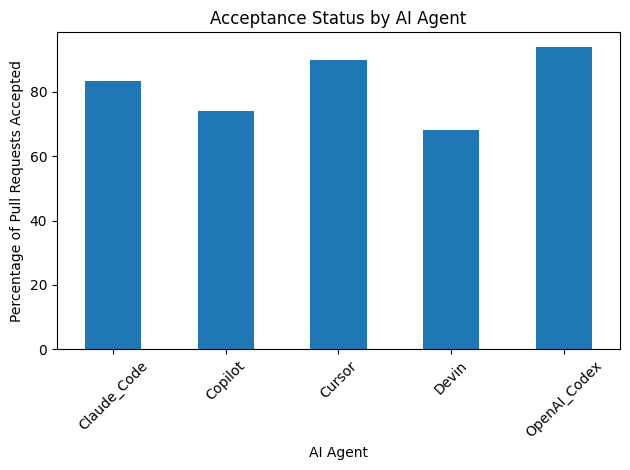

In [146]:
status_by_agent = (
    RQ1_all_pr
    .groupby(["agent", "status"])
    .size()
    .unstack(fill_value=0)
)

status_by_agent = percentage(status_by_agent)["acceptance_percentage"]
status_by_agent.plot(kind="bar")

plt.title("Acceptance Status by AI Agent")
plt.xlabel("AI Agent")
plt.ylabel("Percentage of Pull Requests Accepted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### AI Pull Request (Starred Repos)

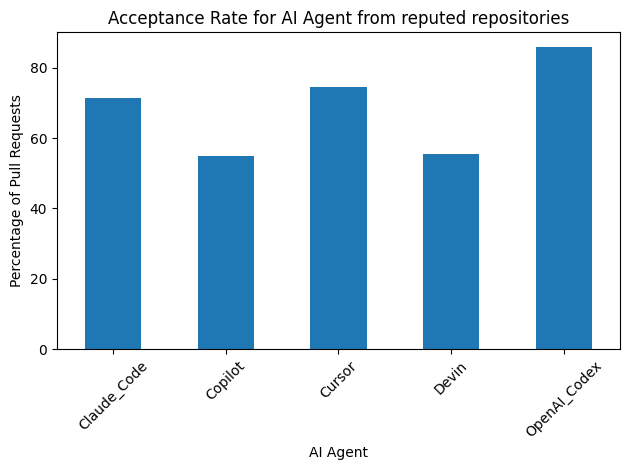

In [149]:
temp2 = pr_df.loc[pr_df["closed_at"].notna()].copy()
RQ1_pr = convert_df(temp2)
status_by_agent = (
    RQ1_pr
    .groupby(["agent", "status"])
    .size()
    .unstack(fill_value=0)
)

status_by_agent = percentage(status_by_agent)["acceptance_percentage"]
status_by_agent.plot(kind="bar")

plt.title("Acceptance Rate for AI Agent from reputed repositories")
plt.xlabel("AI Agent")
plt.ylabel("Percentage of Pull Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Human Pull Requests

status
Accepted    5081
Rejected    1068
Name: count, dtype: int64


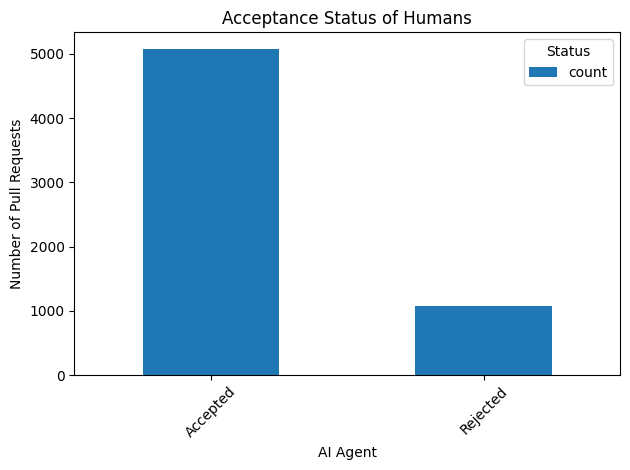

In [159]:
temp3 = human_pr_df.loc[human_pr_df["closed_at"].notna()].copy()
RQ1_human = convert_df(temp3)
status_by_human = RQ1_human["status"].value_counts()
status_by_human.plot(kind="bar")

print(status_by_human)

plt.title("Acceptance Status of Humans")
plt.xlabel("AI Agent")
plt.ylabel("Number of Pull Requests")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

## Research Question - 2

#### Where does AI struggle ?
We observe factors like task type and programming languages to figure out the acceptance rate of Pull Requests in these fields. The Dataframes we would use in this Question are as follows -
- all_pr_df
- all_repo_df
- pr_task_type_df

Essentially we are merging all_pr_df and all_repo_df using repo_id these datasets to find the programming language and merging all_pr_df and pr_task_type_df using 

#### Acceptance Rate for Programming Languages

In [160]:
programming_language = pd.merge(all_pr_df,all_repo_df,left_on="repo_id",right_on="id",how="inner")

programming_language = programming_language[programming_language["state"] == "closed"]

programming_language = programming_language[["id_x","agent","user_id","state","created_at","closed_at","merged_at","repo_id","language"]]

programming_language["status"] = np.where(programming_language["merged_at"].isna(), "Rejected", "Accepted")

programming_language = programming_language[["id_x","agent","user_id","created_at","status","language"]]

language
C++           87.555770
Rust          88.187145
Go            88.703228
TypeScript    89.384623
C#            89.670909
Java          91.367403
Python        93.699257
JavaScript    93.923061
HTML          93.963762
PHP           94.398547
Name: acceptance_percentage, dtype: float64


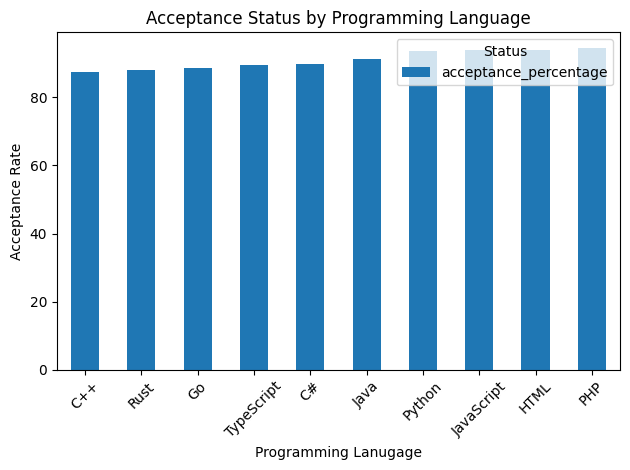

In [157]:
status_by_lang_top10 = (
    status_by_lang
    .assign(total=lambda x: x.sum(axis=1))   # Accepted + Rejected
    .sort_values("total", ascending=False)
    .head(10)
    .drop(columns="total")
)

status_by_lang_top10 = percentage(status_by_lang_top10)["acceptance_percentage"].sort_values()
print(status_by_lang_top10)

status_by_lang_top10.plot(kind="bar")

plt.title("Acceptance Status by Programming Language")
plt.xlabel("Programming Lanugage")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

#### Acceptance Rate for Task Types

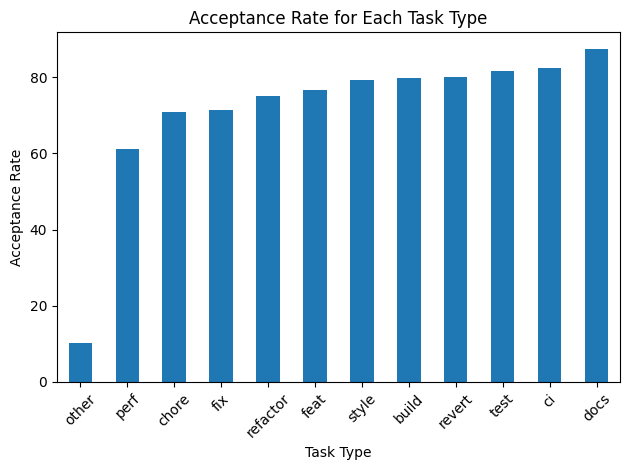

In [158]:
task_type = pd.merge(all_pr_df,pr_task_type_df,on="id",how="inner")
task_type = task_type[task_type["state"] == "closed"]
task_type["status"] = np.where(task_type["merged_at"].isna(), "Rejected", "Accepted")
task_type[["id","agent_x","state","type","status"]]

status_by_type = (
    task_type
    .groupby(["type", "status"])
    .size()
    .unstack(fill_value=0)
)

status_by_type = percentage(status_by_type)["acceptance_percentage"].sort_values()
status_by_type.plot(kind="bar")

plt.title("Acceptance Rate for Each Task Type")
plt.xlabel("Task Type")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Research Question - 3

#### Which group of users predominantly use AI Agents?
Here we hope to classify users based on their coding experience by looking at when their github user account was created. We classify users into three groups - veterans (more than 5 years of experience), intermediate (between 2 and 5 years of experience) and beginners (less than 2 years of experience). Then we see the distribution of AI pull requests among these users.

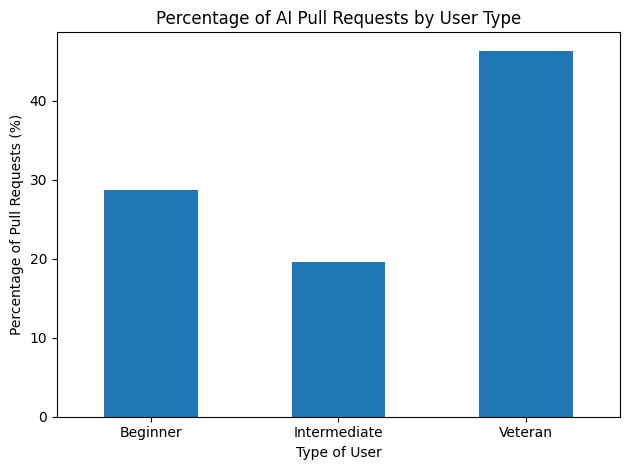

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = all_user_df.copy()
users["id"] = pd.to_numeric(users["id"], errors="coerce").astype("Int64")

merged_df = pd.merge(
    all_pr_df,
    users,
    left_on="user_id",
    right_on="id",
    how="left",
    suffixes=("_pr", "_user")
)

merged_df["user_created_at"] = pd.to_datetime(
    merged_df["created_at_user"], errors="coerce", utc=True
)

today_utc = pd.Timestamp.now(tz="UTC")

merged_df["account_age_years"] = (
    (today_utc - merged_df["user_created_at"]).dt.days / 365.25
)

merged_df["type_of_user"] = np.select(
    [
        merged_df["account_age_years"].notna() & (merged_df["account_age_years"] < 2),
        merged_df["account_age_years"].notna() & merged_df["account_age_years"].between(2, 5, inclusive="left"),
        merged_df["account_age_years"].notna() & (merged_df["account_age_years"] >= 5),
    ],
    ["Beginner", "Intermediate", "Veteran"],
    default="Unknown"
)

user_type_pct = (
    merged_df["type_of_user"]
    .value_counts(normalize=True)
    .reindex(["Beginner", "Intermediate", "Veteran"])
    * 100
)

user_type_pct.plot(kind="bar")
plt.title("Percentage of AI Pull Requests by User Type")
plt.xlabel("Type of User")
plt.ylabel("Percentage of Pull Requests (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()